In [1]:
# Все для визуализации
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

# Все для работы с данными
import numpy as np
import pandas as pd
import bdorch
import config

In [2]:
# Получаем данные 
df = pd.read_csv('data.csv')
df

,Возраст,Пол,В браке,Количество детей,Уровень образования,Доход в месяц,Тип занятости,Стаж на текущем месте работы (лет),Общий трудовой стаж (лет),Тип жилья,...,Частота смены места работы за последние 5 лет,"Наличие других займов (например, микрозаймы)",Наличие загранпаспорта,Частота поездок за границу за последние 5 лет,Наличие недвижимости кроме основного жилья,Оценка стоимости всего имущества,Уровень финансовой грамотности,Платеж по текущему кредиту в месяц,Количество сданных лаб по информатике,Дефолт
0,31,Мужчина,Нет,0,Колледж,121000,Нет работы,2,6,Арендованное,...,10,7,Да,8,2,5221000,Низкий,71000,3,False
1,28,Женщина,Нет,1,Аспирант,97000,Постоянная работа,3,3,Арендованное,...,3,6,Нет,18,9,5216000,Высокий,38000,3,False
2,42,Мужчина,Да,3,Колледж,135000,Постоянная работа,18,24,Собственное,...,9,9,Да,7,6,7844000,Средний,39000,3,False
3,38,Мужчина,Нет,2,Доктор наук,91000,Постоянная работа,16,16,Ипотека,...,4,5,Нет,13,10,6333000,Средний,73000,0,True
4,29,Женщина,Нет,4,Бакалавр,102000,Нет работы,0,1,Собственное,...,6,5,Да,5,3,11357000,Низкий,37000,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19,Мужчина,Да,1,Школа - 9,111000,Самозанятый,1,1,Арендованное,...,9,8,Да,12,8,6359000,Низкий,95000,4,False
9996,45,Мужчина,Нет,0,Бакалавр,89000,Самозанятый,2,7,Ипотека,...,7,8,Нет,6,0,2507000,Низкий,76000,3,False
9997,37,Мужчина,Нет,3,Школа - 9,112000,Самозанятый,9,11,Ипотека,...,8,2,Нет,2,2,2440000,Средний,56000,3,True
9998,60,Мужчина,Нет,6,Колледж,95000,Самозанятый,7,22,Арендованное,...,7,1,Нет,11,10,7825000,Низкий,22000,2,False


In [3]:
# Переводим в числовой формат

df = pd.get_dummies(df, columns=['Пол'])

yn_col = ["В браке", "Наличие автомобиля", "Наличие банковских вкладов", "Страхование жизни", "Наличие загранпаспорта"]

for i in yn_col:
    df[i] = df[i].map({'Нет': 0, 'Да': 1})

edu_levels = ['Нет',
              'Школа - 9',
              'Школа - 11',
              'Колледж',
              'Бакалавр',
              'Магистр / Спец',
              'Аспирант',
              'Доктор наук']

works = ['Нет работы', 'Самозанятый', 'ИП', 'Постоянная работа', 'ООО']

live = ["Арендованное", "Ипотека", "Собственное"]

finance = ["Низкий", "Средний", "Высокий"]

df['Уровень образования'] = df['Уровень образования'].map({edu_levels[i]: i for i in range(len(edu_levels))})
df['Тип занятости'] = df['Тип занятости'].map({works[i]: i for i in range(len(works))})
df['Тип жилья'] = df['Тип жилья'].map({live[i]: i for i in range(len(live))})
df['Уровень финансовой грамотности'] = df['Уровень финансовой грамотности'].map(
    {finance[i]: i for i in range(len(finance))})

df

,Возраст,В браке,Количество детей,Уровень образования,Доход в месяц,Тип занятости,Стаж на текущем месте работы (лет),Общий трудовой стаж (лет),Тип жилья,Наличие автомобиля,...,Наличие загранпаспорта,Частота поездок за границу за последние 5 лет,Наличие недвижимости кроме основного жилья,Оценка стоимости всего имущества,Уровень финансовой грамотности,Платеж по текущему кредиту в месяц,Количество сданных лаб по информатике,Дефолт,Пол_Женщина,Пол_Мужчина
0,31,0,0,3,121000,0,2,6,0,1,...,1,8,2,5221000,0,71000,3,False,False,True
1,28,0,1,6,97000,3,3,3,0,1,...,0,18,9,5216000,2,38000,3,False,True,False
2,42,1,3,3,135000,3,18,24,2,0,...,1,7,6,7844000,1,39000,3,False,False,True
3,38,0,2,7,91000,3,16,16,1,1,...,0,13,10,6333000,1,73000,0,True,False,True
4,29,0,4,4,102000,0,0,1,2,0,...,1,5,3,11357000,0,37000,2,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19,1,1,1,111000,1,1,1,0,1,...,1,12,8,6359000,0,95000,4,False,False,True
9996,45,0,0,4,89000,1,2,7,1,0,...,0,6,0,2507000,0,76000,3,False,False,True
9997,37,0,3,1,112000,1,9,11,1,0,...,0,2,2,2440000,1,56000,3,True,False,True
9998,60,0,6,3,95000,1,7,22,0,1,...,0,11,10,7825000,0,22000,2,False,False,True


In [4]:
# Делим на train и test
train, test = bdorch.data_split(df)

x_train, y_train = bdorch.get_xy(train)
x_test, y_test = bdorch.get_xy(test)
x_train = bdorch.scale_data(x_train)
x_test = bdorch.scale_data(x_test)

In [5]:
# Создаем модель
model = bdorch.Perceptron()

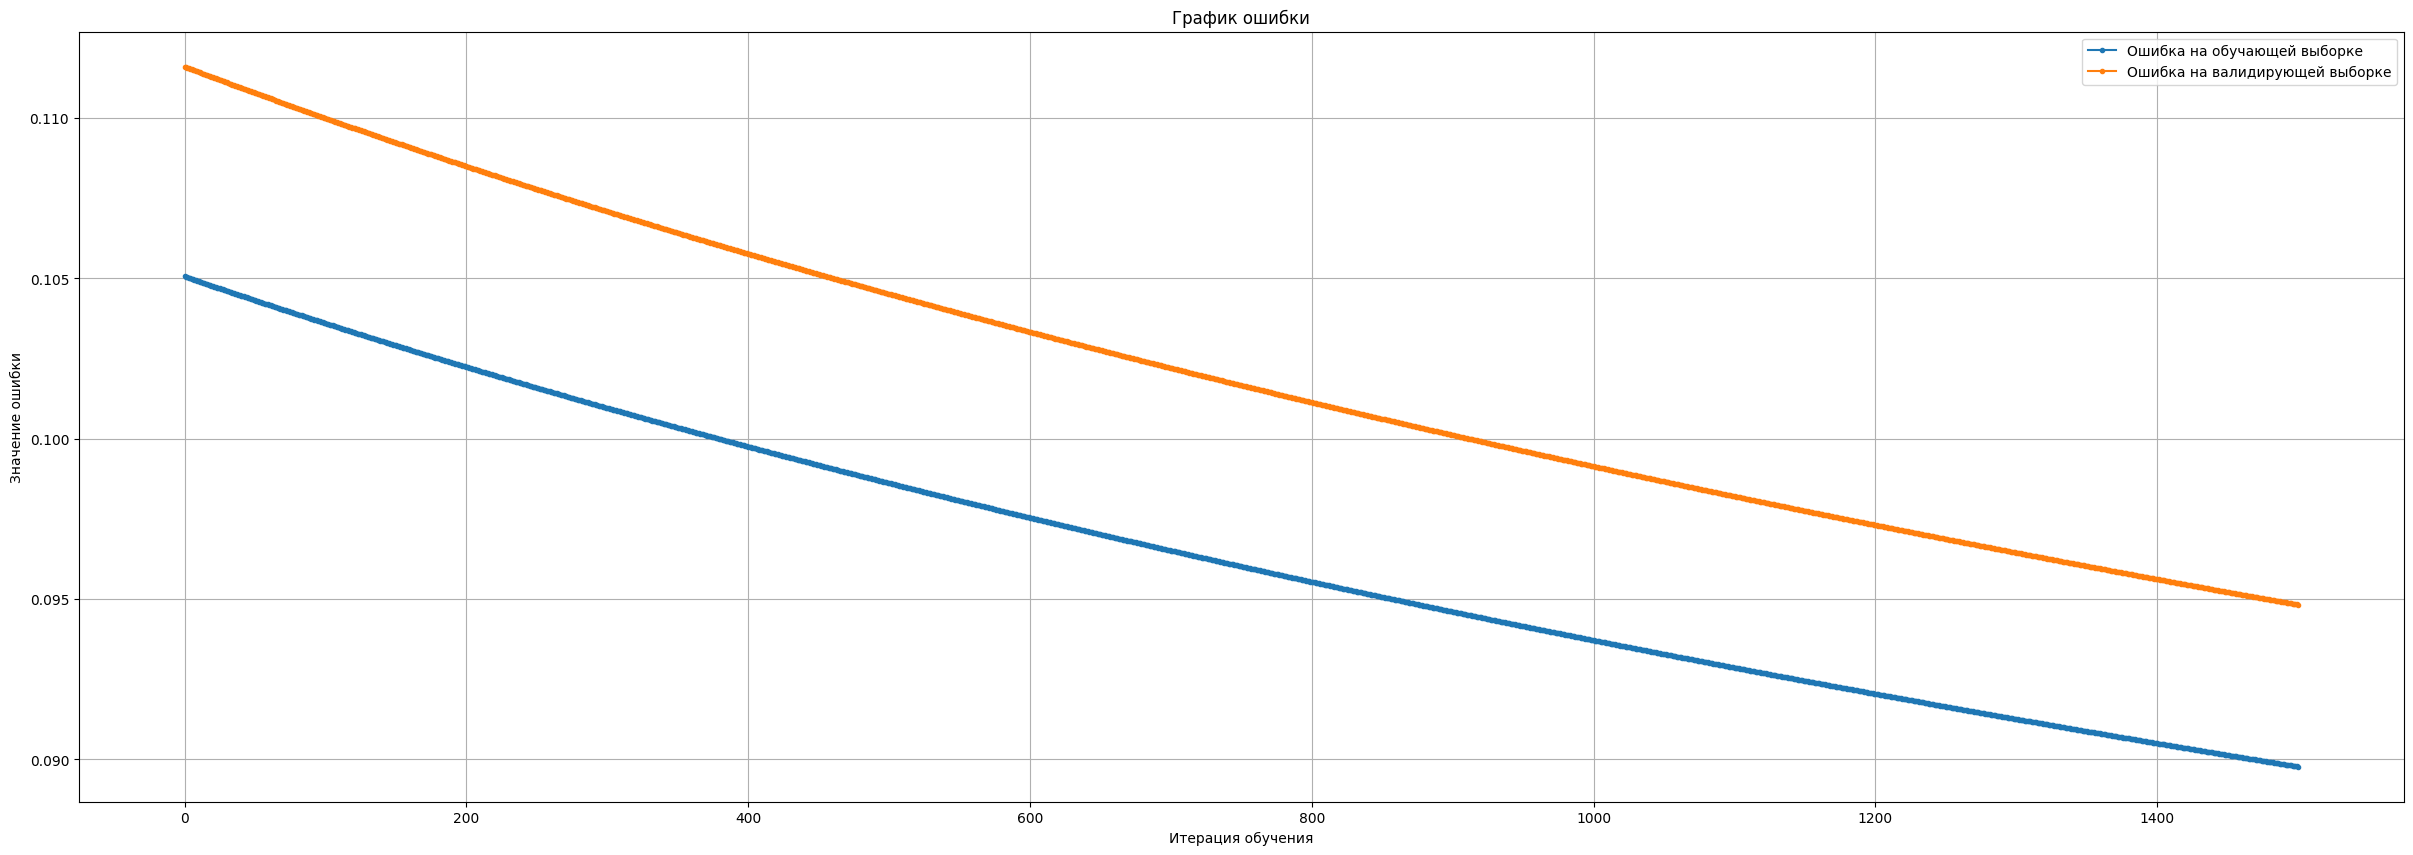

In [9]:
# Обучаем модель
losses = []
test_losses = []
for epoch in range(config.epochs + 1):
    y_pred = model(x_train)

    loss = bdorch.cross_entropy(y_train, y_pred)
  
    grad = np.array([[i] for i in bdorch.w_grad(x_train, y_train, y_pred)])
    
    model.w -= config.alpha * grad
    model.b -= config.alpha * bdorch.b_grad(y_train, y_pred)

    losses.append(loss.item())
    test_losses.append(bdorch.cross_entropy(y_test, model(x_test)))
    if epoch % 100 == 0:
        clear_output(True)
        fig, ax = plt.subplots(figsize=(30, 10))
        plt.title("График ошибки")
        plt.plot(losses, ".-", label = "Ошибка на обучающей выборке")
        plt.plot(test_losses, ".-", label = "Ошибка на валидирующей выборке")
        plt.legend()

        plt.xlabel("Итерация обучения")
        plt.ylabel("Значение ошибки")
        plt.grid()
        plt.show()


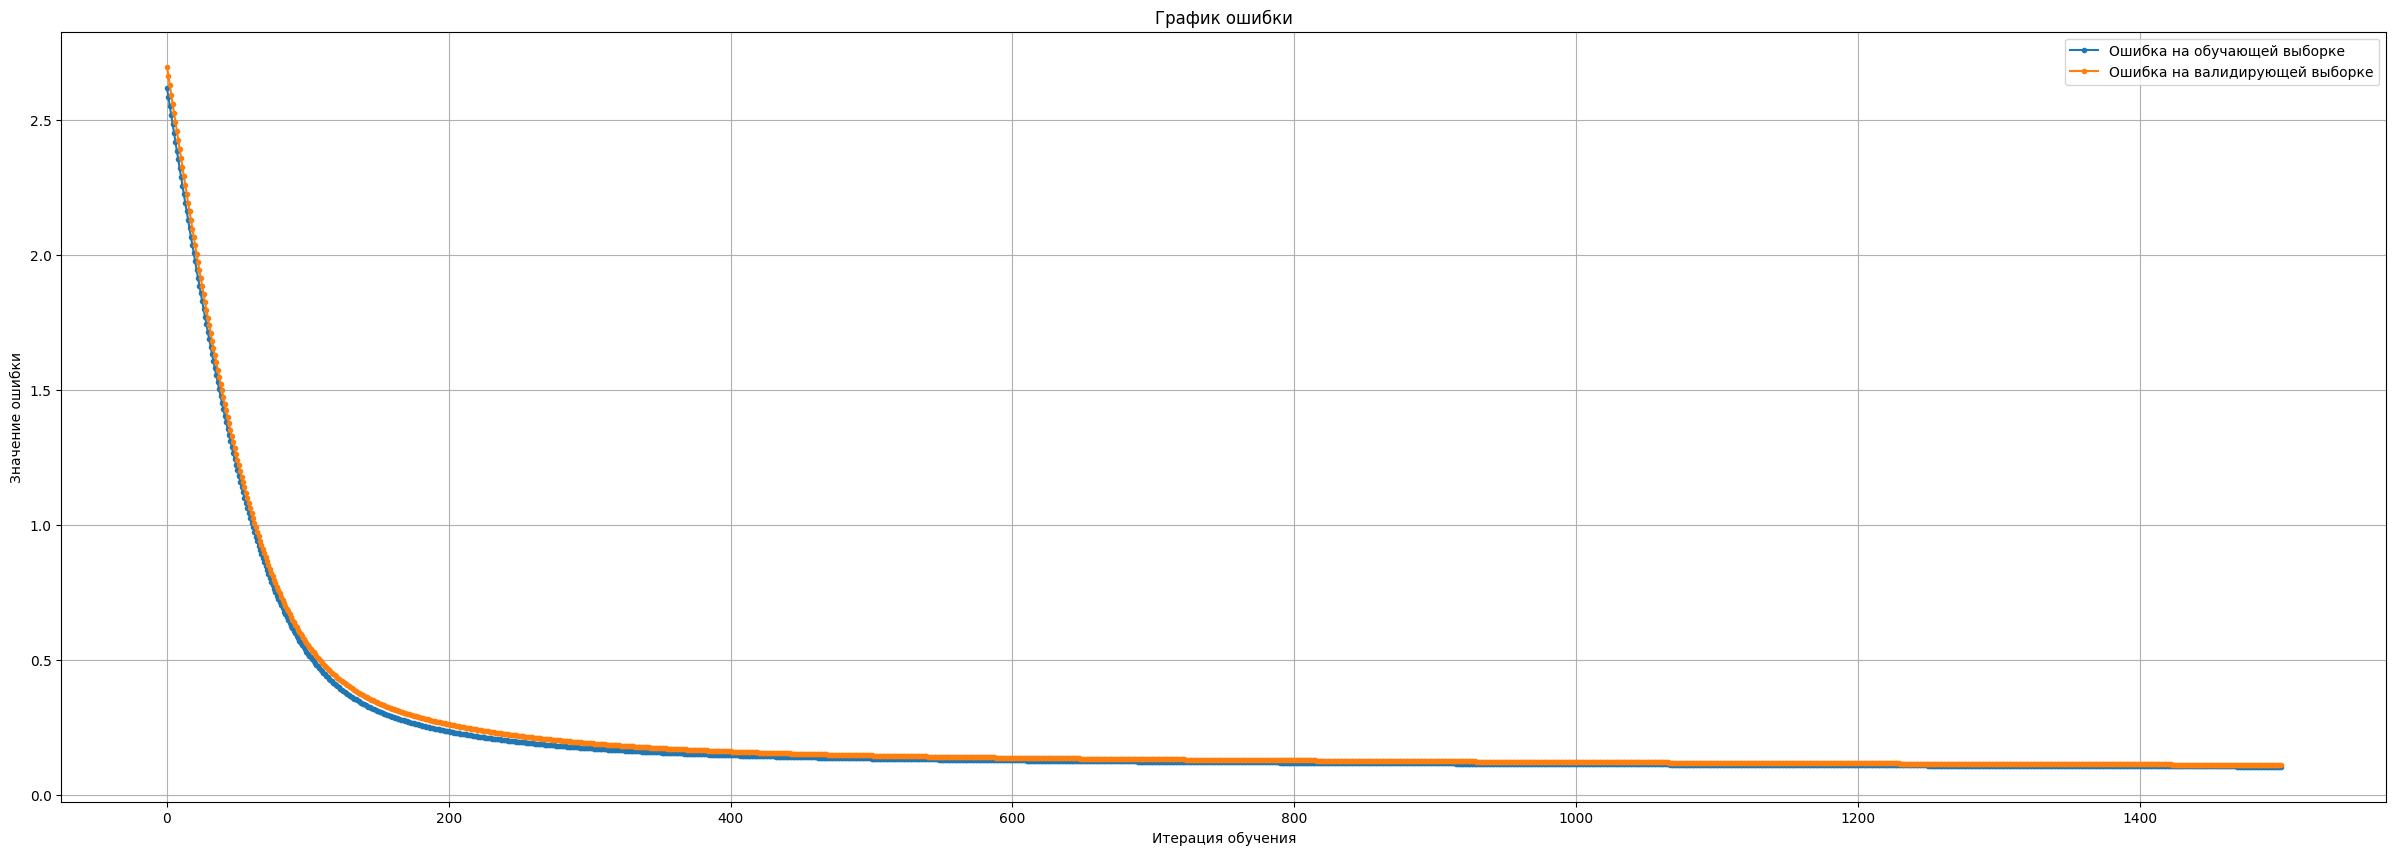

In [7]:
clear_output(True)
fig, ax = plt.subplots(figsize=(30, 10))
plt.title("График ошибки")
plt.plot(losses, ".-", label = "Ошибка на обучающей выборке")
plt.plot(test_losses, ".-", label = "Ошибка на валидирующей выборке")
plt.legend()

plt.xlabel("Итерация обучения")
plt.ylabel("Значение ошибки")
plt.grid()
plt.show()

In [10]:
print(f'Итоговая точность: {bdorch.get_acc(y_test, model(x_test)):.2f}%')

Итоговая точность: 95.85%
